In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from Functions import *
from DataDefined import * 

In [2]:
def feature_importance_visualizer(X, model, label, color=None, grid=None):
    """Helper function to visualize the top 10 most important features.

    Args:
        X (pd.DataFrame): Dataframe containing all columns except target.
        model (instance): An instance of a classifier model.
        label (str): Label for model name.
        color (str, optional): Color for bars in plot. Defaults to None.
        grid (bool, optional): Whether gridlines should be included or not. Defaults to None.
    """
    features_list = X.columns.values
    feature_importance = model.feature_importances_

    # Get the indices of the top 10 most important features
    sorted_idx = np.argsort(feature_importance)[-10:]

    plt.figure(figsize=(8, 6))
    plt.barh(range(10), feature_importance[sorted_idx], align='center', color=color)
    plt.yticks(range(10), features_list[sorted_idx])
    plt.xlabel('Importance')
    plt.title("Top 10 Feature Importances According to " + label + " Classifier")
    if grid:
        plt.grid(alpha=0.5)
    plt.show()

In [3]:
df = pd.read_csv('Driving Data(KIA SOUL)_(150728-160714)_(10 Drivers_A-J).csv')

In [ ]:
# Dropping the columns with only one value
df = df.drop(df[one_val_col],axis=1)
# Drop irrelevant columns
#df = df.drop(irrelevant_col,axis=1)

# Dropping PathOrder, as we can't use this information because we don't know what it stands for
df = df.drop('PathOrder', axis=1)

#plot the to be scaled columns
#plot_distr(df, to_be_scaled_col, 3)

## if we want to fumble with the distribution a bit, unblock the following code:
#col_to_change = to_be_scaled_col #for now I've set them to all of them, change this if you don't want this
#df[col_to_change] = np.log1p(df[col_to_change])

##Scaling the numerically distributed columns to a normal distribution between -1 and 1
df = scale_to_norm_dist(df, to_be_scaled_col)
##Scaling the two valued columns to 0 and 1
df = scale_to_two_val(df, two_val_col)

##Scaling the values with only a couple numerical values between 0 and 1
for col in some_val_num_col:
    df[col] = df[col]/df[col].max()
##Encoding the categorical numbers between 0 and 1
df, label_mappings = encode_scale(df, some_val_cat_col)

In [ ]:
## Model training
X = df.drop(['Class'], axis=1)
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [5]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1424
           B       0.99      1.00      0.99      2565
           C       0.98      0.98      0.98      1460
           D       0.99      0.99      0.99      2599
           E       1.00      1.00      1.00      1717
           F       0.99      1.00      1.00      2286
           G       1.00      0.99      0.99      1530
           H       0.99      0.99      0.99      1981
           I       1.00      0.96      0.98      1606
           J       0.97      1.00      0.98      1708

    accuracy                           0.99     18876
   macro avg       0.99      0.99      0.99     18876
weighted avg       0.99      0.99      0.99     18876



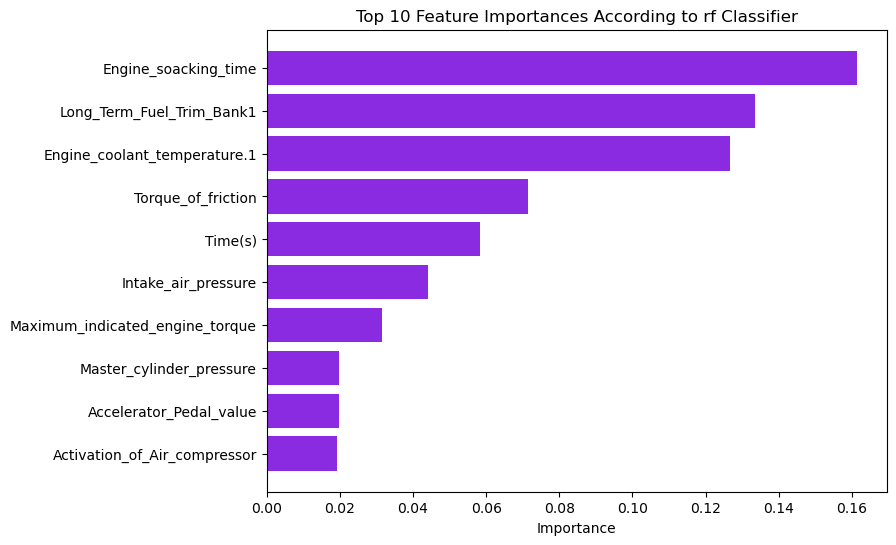

In [6]:
feature_importance_visualizer(X, rf, 'rf', color="blueviolet")

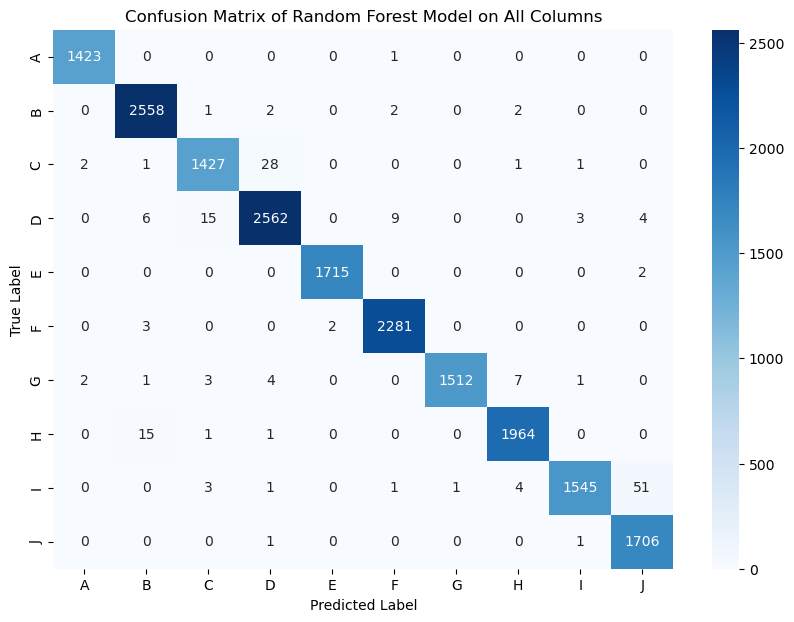

In [8]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels= ['A',  'B',  'C',  'D',  'E',  'F',  'G',  'H',  'I',  'J'], 
            yticklabels= ['A',  'B',  'C',  'D',  'E',  'F',  'G',  'H',  'I',  'J'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Random Forest Model on All Columns')
plt.show()